In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('Mall_Customers.csv', encoding='unicode_escape')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
# To count the total of each gender
data["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Text(0, 0.5, 'Spending Frequency')

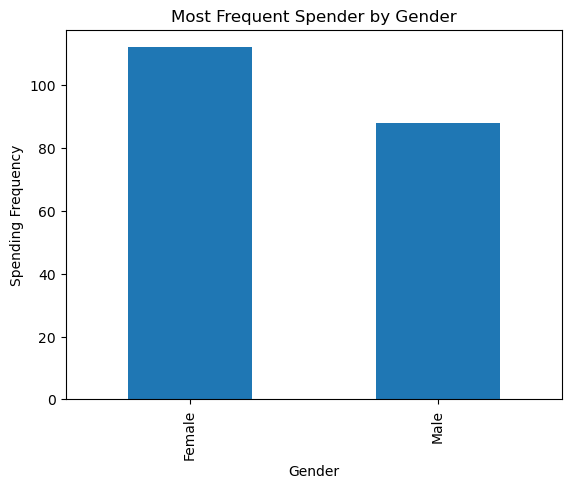

In [24]:
# To create visualization for the data
data["Gender"].value_counts().plot(kind="bar")
plt.title("Most Frequent Spender by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Frequency")

In [25]:
# From the bar chart, we can see that the most frequent spender in the mall is Female with a total of 122
# Male has the lowest spending frequency in the mall which is 88

In [26]:
# Group annual income and spending score
income_spending = data.groupby('Annual Income (k$)', 
                               as_index=False)['Spending Score (1-100)'].sum().sort_values(by="Spending Score (1-100)", ascending=True)

# Show the total spending score for each annual income from lowest to highest
print(income_spending)

    Annual Income (k$)  Spending Score (1-100)
12                  30                      77
9                   25                      78
43                  74                      82
1                   16                      83
35                  64                      88
..                 ...                     ...
40                  71                     300
33                  62                     301
24                  48                     314
47                  78                     571
27                  54                     590

[64 rows x 2 columns]


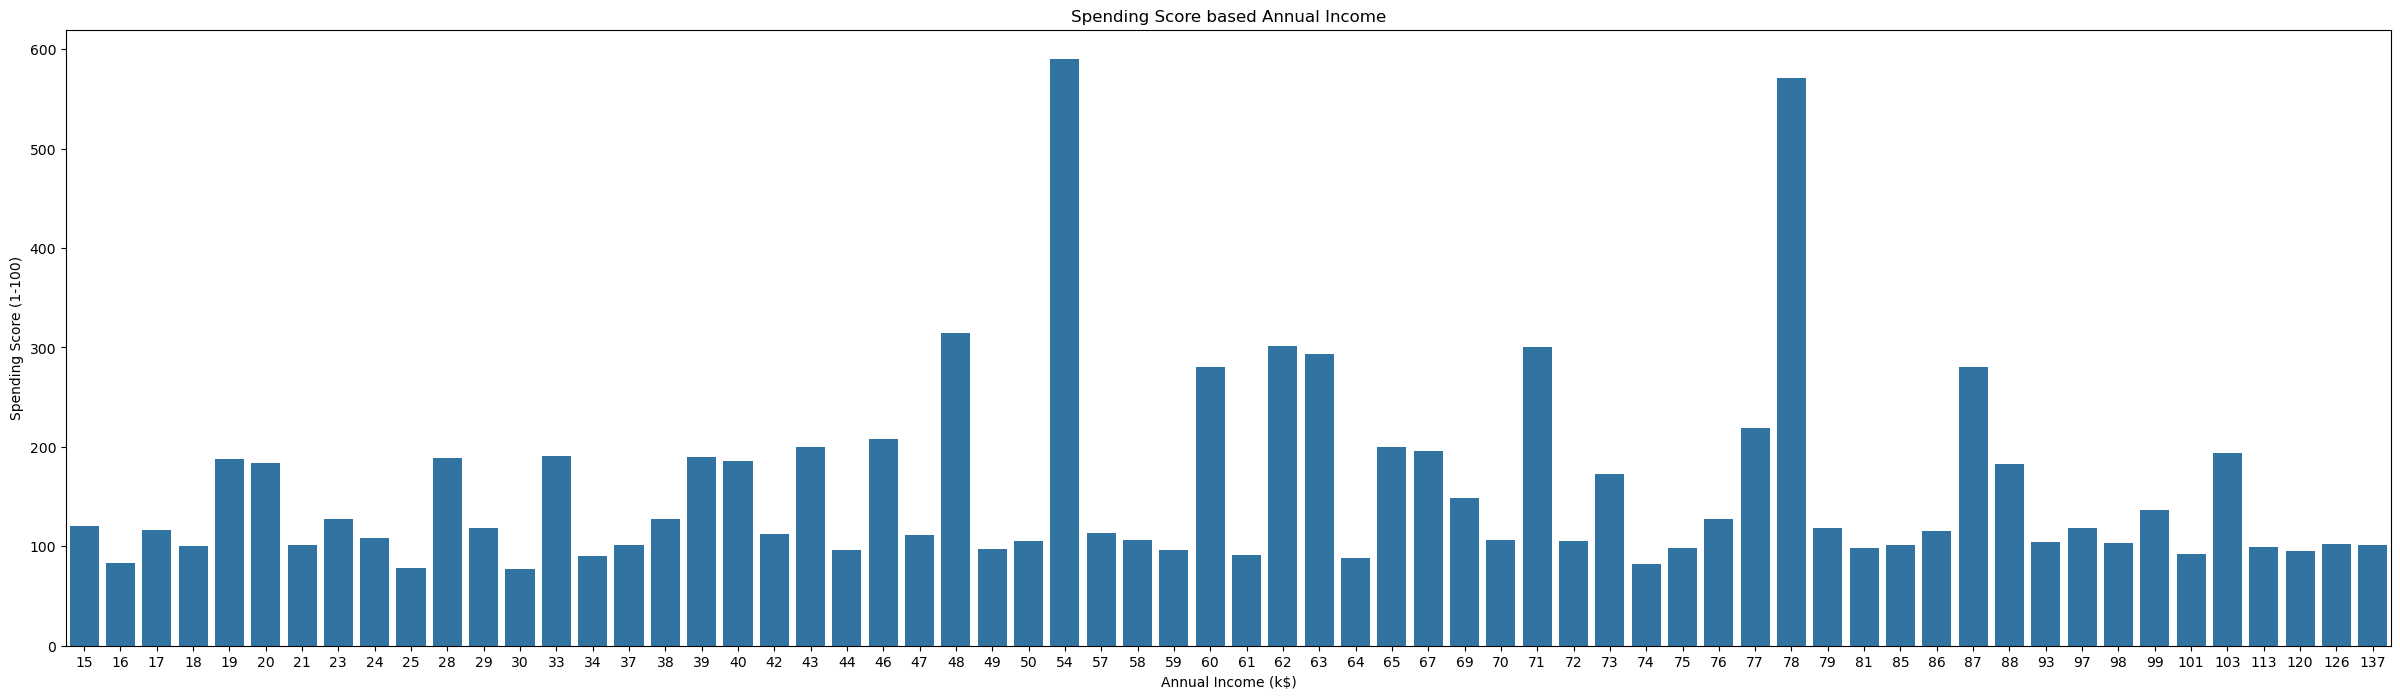

In [27]:
# Visualize data -> most spending based on annual income
plt.figure(figsize=(30, 8))
sns.barplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=income_spending)
plt.title('Spending Score based Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [28]:
## From the bar chart above, people with the annual income of $54k has the highest spending score in the mall
# The lowest spending score in the mall is by people with the annual income of $30k.

In [29]:
# Group age with annual income to show average of annual income by age
age_income = data.groupby('Age', as_index = False)['Annual Income (k$)'].mean()
print(age_income)

    Age  Annual Income (k$)
0    18           51.250000
1    19           57.000000
2    20           41.600000
3    21           38.800000
4    22           31.333333
5    23           41.500000
6    24           39.250000
7    25           57.666667
8    26           58.000000
9    27           63.166667
10   28           85.250000
11   29           63.600000
12   30           76.142857
13   31           48.375000
14   32           87.181818
15   33           80.333333
16   34           79.000000
17   35           46.666667
18   36           81.000000
19   37           65.000000
20   38           74.500000
21   39           72.666667
22   40           61.666667
23   41          101.000000
24   42           60.000000
25   43           65.666667
26   44           75.500000
27   45           69.333333
28   46           59.000000
29   47           70.166667
30   48           58.200000
31   49           51.000000
32   50           58.600000
33   51           55.500000
34   52           55

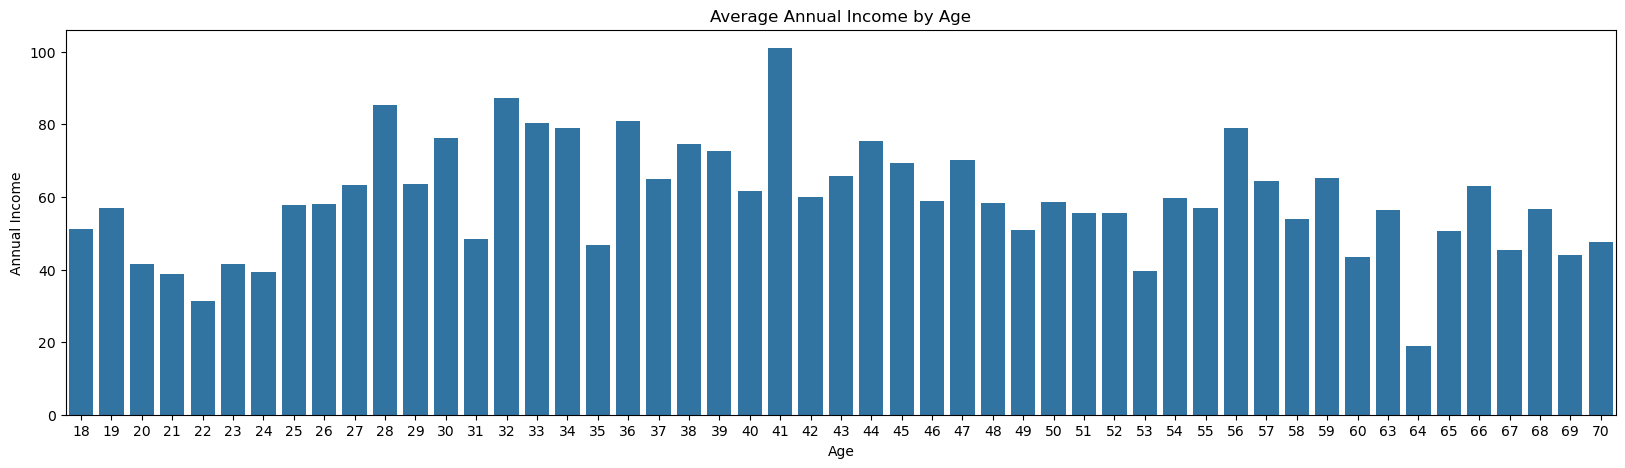

In [30]:
# Visualize data -> average annual income by age
plt.figure(figsize=(20,5))
sns.barplot(x="Age", y= "Annual Income (k$)", data=age_income)
plt.title("Average Annual Income by Age")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

In [31]:
# From the data above we can see that people with the age of 41 has the highest average income
# We can also see from the bar chart, people with the age of 64 has the lowest average income.

In [32]:
# Find out age that has the highest/lowest average spending
# Group age with spending
age_spending = data.groupby("Age", as_index = False)["Spending Score (1-100)"].mean()
print(age_spending)

    Age  Spending Score (1-100)
0    18               60.000000
1    19               39.750000
2    20               40.200000
3    21               66.800000
4    22               70.000000
5    23               63.333333
6    24               71.500000
7    25               39.666667
8    26               54.500000
9    27               60.333333
10   28               70.000000
11   29               76.600000
12   30               80.285714
13   31               63.875000
14   32               66.000000
15   33               54.333333
16   34               39.200000
17   35               63.888889
18   36               52.500000
19   37               15.333333
20   38               63.166667
21   39               84.666667
22   40               47.500000
23   41               28.000000
24   42               18.500000
25   43               34.000000
26   44               13.500000
27   45               37.666667
28   46               21.333333
29   47               28.500000
30   48 

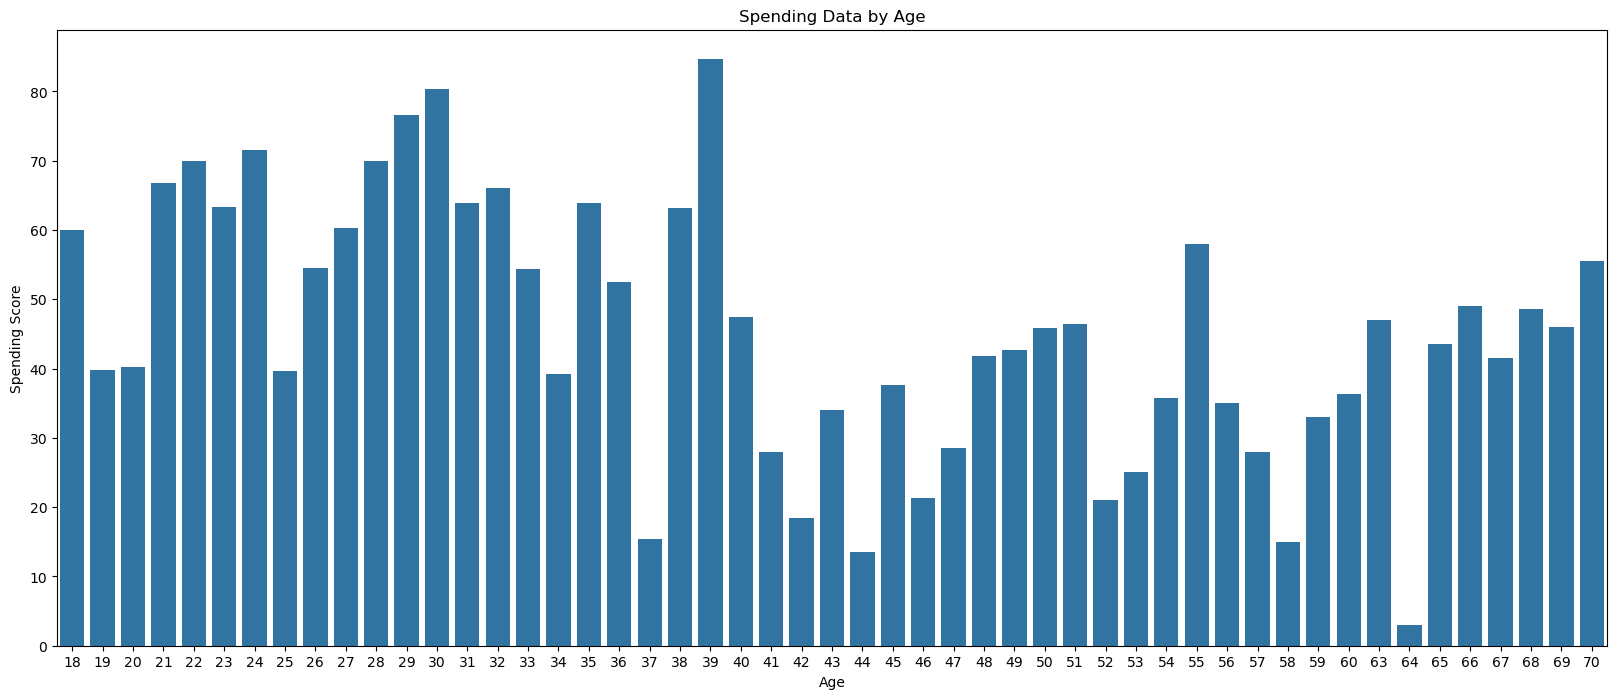

In [33]:
# Visualization data -> show the spending by age
plt.figure(figsize=(20,8))
sns.barplot(x="Age", y="Spending Score (1-100)", data = age_spending)
plt.title("Spending Data by Age")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

In [34]:
# From the bar chart, we can see that people with the age 39 has the highest spending
# People with the age 64 has the lowest spending based on age

In [35]:
# To find correlation between the data
# Since the dataset contains numeric and categorical data, we need to exclude them

# Select only numeric columns
numeric_data = data.select_dtypes(include=["int64"])

# Compute correlation on numeric columns only
correlation_matrix = numeric_data.corr()
# Display the matrix
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [36]:
# From the correlation we can see that:
# Age vs Annual Income: -0.012398
# This means that Age has a negative and almost no correlation with Annual income.
# This suggests that customer's age do not affect their annual income.
# Thus meaning older customers do not mean their are wealthier or poorer than the younger customers.

# Age vs Spending Score: -0.327227
# This means that Age has a negative correlation with Spending Score
# This means that the lower the customer's age, the higher the spending.
# Based on the correlation, we can assume that younger customers have a higher spending than older customers.

# Annual Income vs Spending Score: 0.009903
# This means that Annual Income has little to no correlation with Spending Score
# This suggests that annual income does not affect customer's spending score.
# The higher or lower customer's annual income, do not affect their spending score.

In [37]:
# For Standarization
from sklearn.preprocessing import StandardScaler
new_data = data.drop_duplicates()
col_names = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
features = new_data[col_names]
scaler = StandardScaler().fit(features.values)
features= scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
print(scaled_features.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

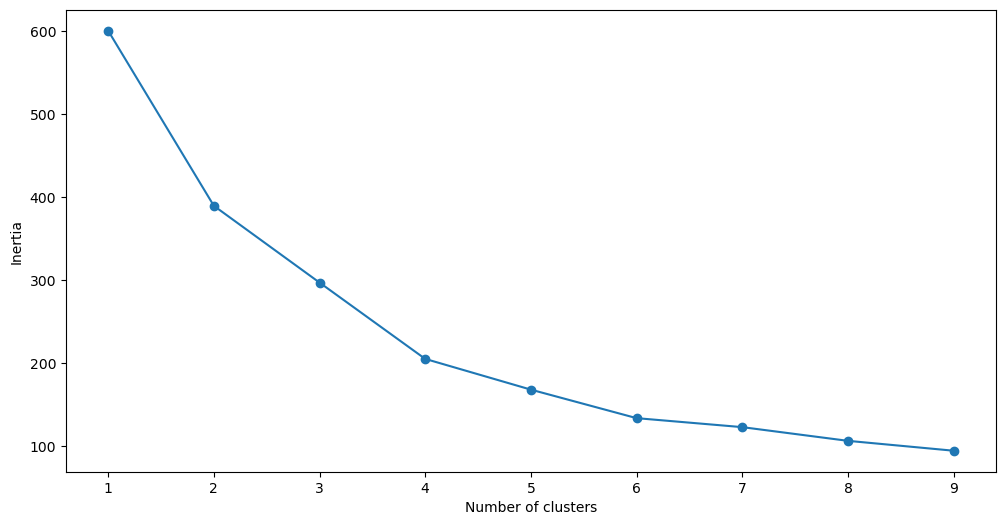

In [38]:
# Building Customer Segmentation Model
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init="k-means++")
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

# Convert the results into a dataframe and plotting them
frame = pd.DataFrame({"Cluster":range(1,10), "SSE":SSE})
plt.figure(figsize=(12,6))
plt.plot(frame["Cluster"], frame["SSE"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [39]:
# Build model with 3 clusters
kmeans = KMeans(n_clusters = 3, init="k-means++")
kmeans.fit(scaled_features)

print(silhouette_score(scaled_features, kmeans.labels_, metric="euclidean"))

0.35674960820006363


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
# The inertia value for 3 cluster is 0.35, which is a reasonable cluster seperation
# Assign clusters to each customer
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_data)
frame["cluster"] = pred
print (frame.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


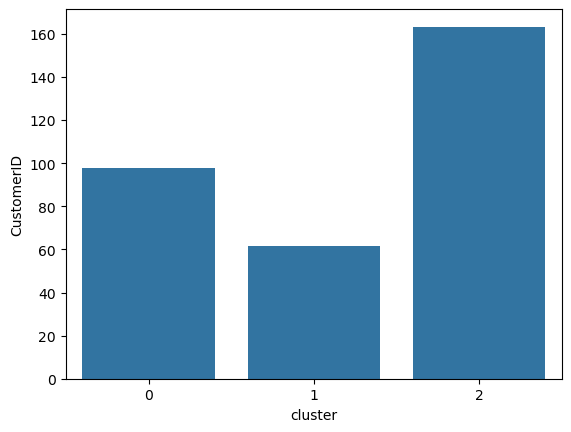

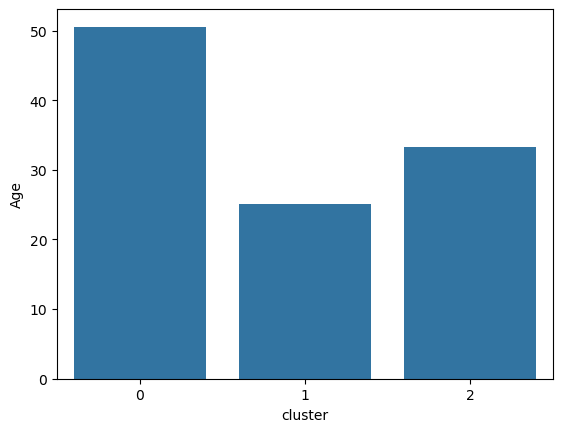

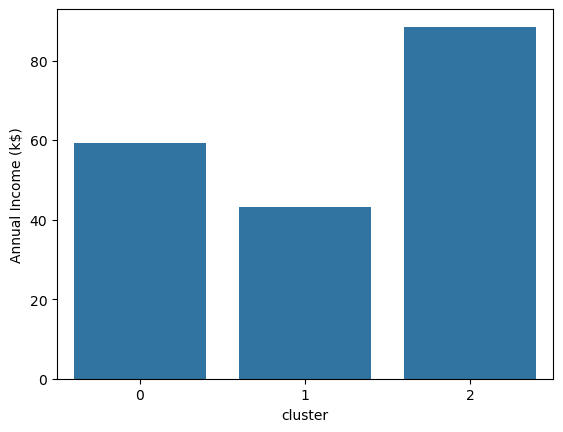

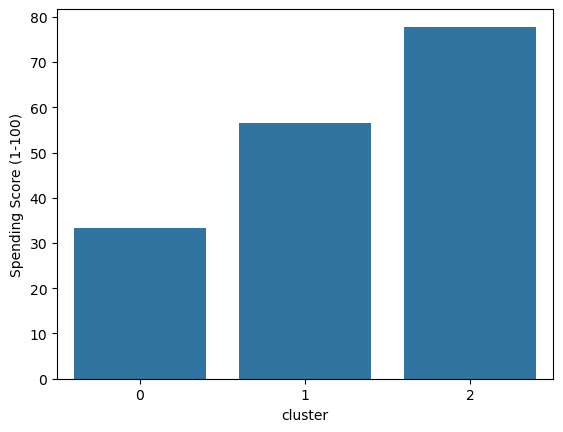

In [41]:
# Visualize the data
frame = frame.drop("Gender", axis=1)
avg_df = frame.groupby(["cluster"], as_index = False).mean()
list1 = avg_df.columns[1:].tolist()
for i in list1:
    sns.barplot(x="cluster", y=str(i), data=avg_df)
    plt.show()

In [42]:
# These clusters depicts the customer segmentation of the mall
# The first bar chart shows the segmentation of customers based on age
# Cluster 0 is the cluster for customers with low average age (younger customers from age 0-30)
# Cluster 1 is for customers with moderate average age (middle-aged from 30-40)
# Cluster 2 is for customers with highest average age (older customers from 40+)

# The second bar chart shows the annual income based on clusters
# Based on the summary from the first bar chart, middle-aged customers (cluster 1) has the highest annual income compare to cluster 0 and cluster 2

# Third bar chart shows the annual spending based on clusters
# From the bar chart, we can see that younger customers (cluster 0) has the highest spending compare to older customers (cluster 1 and 2)

# Insight and innovation based on customer segmentation
# Based on the clustering, we can see that younger customers tends to spend more than older customers.
# Based on that information, management of the mall should focus more on younger-to-moderate age customers.
# This is because based on the data, younger customers tend to spend more than the older customers, and
# middle-aged customers has the highest annual income.
# By focusing on younger and middle-aged customers, the total visitors and spenders in the mall will increase.
# To attract younger customers, the management of the mall should focus on what interest younger customers, 
# such as trendy clothes, toys and figures, accessories, etc.
# Meanwhile, middle-aged customers might prefer family or home related activities and stores.
